In [14]:
# Check scikit-learn version
import sklearn
# This is the version that will be used
print(sklearn.__version__)
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
import numpy as np

0.23.1


In [15]:
from numpy import where
#from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib import pyplot

In [16]:
import pandas as pd

In [17]:
data = pd.read_csv('Data/combined_data.csv')
data.head()

,Unnamed: 0,Country,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),...,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
0,0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,...,0.0,97.0,97.0,0.1,4245.39744,5479531.0,0.9,0.8,0.893,17.0
1,1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,...,0.0,93.0,93.0,0.1,5314.64416,5683483.0,1.1,0.9,0.923,19.2
2,2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,...,0.0,97.0,97.0,0.1,8989.84240,8282396.0,0.4,0.3,0.938,16.0
3,3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,...,0.0,92.0,92.0,0.1,5734.44360,33815.0,1.0,0.9,0.919,19.0
4,4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,...,0.0,95.0,95.0,0.1,7455.24654,518867.0,0.8,0.7,0.948,17.7


In [42]:
data = data[['Happiness_Score', 'GDP', 'Social_Support',
       'Life_Expectancy (Happiness)', 'Freedom_Score', 'Generosity',
       'Corruption_Score', 'Beer_Servings',
       'Spirit_Servings', 'Wine_Servings',
       'Adult_Mortality',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS',
       'Population', 'thinness1-19years',
       'Schooling']]
data

,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Beer_Servings,Spirit_Servings,Wine_Servings,...,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,Population,thinness1-19years,Schooling
0,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,263.000000,133.000000,97.000000,...,80.905109,2.0,62.100000,0.0,97.0,97.0,0.1,5479531.0,0.900000,17.0
1,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,224.000000,81.000000,278.000000,...,80.905109,9.0,58.800000,0.0,93.0,93.0,0.1,5683483.0,1.100000,19.2
2,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,185.000000,100.000000,280.000000,...,80.905109,35.0,57.400000,0.0,97.0,97.0,0.1,8282396.0,0.400000,16.0
3,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,233.000000,61.000000,78.000000,...,80.905109,0.0,61.000000,0.0,92.0,92.0,0.1,33815.0,1.000000,19.0
4,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,169.000000,71.000000,129.000000,...,80.905109,14.0,61.200000,0.0,95.0,95.0,0.1,518867.0,0.800000,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,17.000000,2.000000,1.000000,...,47.000000,150.0,22.700000,21.0,47.0,47.0,4.4,45461.0,8.200000,7.1
151,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,43.000000,2.000000,0.000000,...,98.000000,1.0,21.400000,15.0,99.0,98.0,0.4,11629553.0,5.700000,10.8
152,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,64.000000,18.000000,4.000000,...,87.000000,0.0,31.800000,32.0,88.0,87.0,6.2,15777451.0,5.600000,10.3
153,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,112.986486,77.831081,54.945946,...,31.000000,878.0,42.298621,39.0,41.0,31.0,3.4,11882136.0,4.493103,4.9


In [43]:
# From Data Normalization Article linked in README

# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(data)

# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_
# array([4.0e+05, 1.7e+01])

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(data)

# store the results in a data frame
data_scaled = pd.DataFrame(scaled_data, columns=data.columns)

#country_id should not be scaled?

# visualize the data frame
data_scaled

,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Beer_Servings,Spirit_Servings,Wine_Servings,...,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,Population,thinness1-19years,Schooling
0,1.000000,0.929138,0.979132,0.936153,0.973512,-0.106092,0.208901,0.699468,0.356568,0.262162,...,0.817223,0.000022,0.869748,0.000000,0.979798,0.979798,0.010753,0.021225,0.033708,0.833333
1,0.979113,0.940905,0.980836,0.942685,0.975842,0.118077,0.180090,0.595745,0.217158,0.751351,...,0.817223,0.000100,0.823529,0.000000,0.939394,0.939394,0.010753,0.022015,0.041199,0.941176
2,0.968138,0.958889,0.967350,0.964818,0.944962,0.188903,0.324640,0.492021,0.268097,0.756757,...,0.817223,0.000387,0.803922,0.000000,0.979798,0.979798,0.010753,0.032082,0.014981,0.784314
3,0.961043,0.940779,1.000000,0.950464,0.973224,0.440450,0.760711,0.619681,0.163539,0.210811,...,0.817223,0.000000,0.854342,0.000000,0.929293,0.929293,0.010753,0.000131,0.037453,0.931373
4,0.958930,0.968310,0.977240,0.953078,0.980259,0.239952,0.281341,0.449468,0.190349,0.348649,...,0.817223,0.000155,0.857143,0.000000,0.959596,0.959596,0.010753,0.002010,0.029963,0.867647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.445132,0.578582,0.327762,0.588507,0.657315,0.146987,0.953207,0.045213,0.005362,0.002703,...,0.474747,0.001660,0.317927,0.019091,0.474747,0.474747,0.473118,0.000176,0.307116,0.348039
151,0.424181,0.663725,0.554891,0.795510,0.923683,0.098961,0.196178,0.114362,0.005362,0.000000,...,0.989899,0.000011,0.299720,0.013636,1.000000,0.989899,0.043011,0.045047,0.213483,0.529412
152,0.422503,0.686921,0.782925,0.724140,0.729702,-0.128533,0.866022,0.170213,0.048257,0.010811,...,0.878788,0.000000,0.445378,0.029091,0.888889,0.878788,0.666667,0.061115,0.209738,0.504902
153,0.360700,0.648464,0.568097,0.664023,0.462887,0.029462,0.815978,0.300496,0.208662,0.148503,...,0.313131,0.009714,0.592418,0.035455,0.414141,0.313131,0.365591,0.046026,0.168281,0.240196


In [44]:
data_scaled.corr().style.background_gradient()

,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Beer_Servings,Spirit_Servings,Wine_Servings,Adult_Mortality,GDP_Health_Gov_Expenditure (%),HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,Population,thinness1-19years,Schooling
Happiness_Score,1.000000,0.775445,0.764109,0.771219,0.592499,0.065331,-0.419593,0.538061,0.341646,0.536227,-0.569297,-0.080572,0.223995,-0.165692,0.464924,-0.253973,0.399783,0.362245,-0.475136,-0.006814,-0.558550,0.701895
GDP,0.775445,1.000000,0.782250,0.851443,0.423071,-0.122246,-0.335573,0.546706,0.395111,0.547392,-0.624344,-0.010646,0.283664,-0.070264,0.579350,-0.223760,0.489651,0.416380,-0.430658,0.018256,-0.499835,0.793026
Social_Support,0.764109,0.782250,1.000000,0.746707,0.482677,-0.054286,-0.212337,0.558448,0.459249,0.452101,-0.515775,-0.128867,0.256557,-0.134792,0.490300,-0.294968,0.411815,0.367047,-0.379339,-0.005451,-0.565577,0.699281
Life_Expectancy (Happiness),0.771219,0.851443,0.746707,1.000000,0.453230,-0.073388,-0.354834,0.472122,0.402451,0.540932,-0.769190,0.027118,0.385094,-0.076902,0.529175,-0.292047,0.532040,0.494070,-0.620344,-0.064756,-0.546692,0.790146
Freedom_Score,0.592499,0.423071,0.482677,0.453230,1.000000,0.251895,-0.421152,0.254851,0.090193,0.234728,-0.216020,-0.049933,0.189746,0.081127,0.095647,-0.016197,0.275055,0.289519,-0.206215,0.007127,-0.244938,0.369642
Generosity,0.065331,-0.122246,-0.054286,-0.073388,0.251895,1.000000,-0.276100,-0.251523,-0.131114,-0.072209,0.023829,-0.022373,-0.011258,0.073776,-0.160737,0.089885,-0.139478,-0.018542,-0.016582,0.211263,0.135642,-0.138848
Corruption_Score,-0.419593,-0.335573,-0.212337,-0.354834,-0.421152,-0.276100,1.000000,-0.141854,0.042956,-0.328477,0.247546,0.092506,-0.127693,0.068507,-0.218117,0.087555,-0.220425,-0.186334,0.149487,0.064316,0.183507,-0.319420
Beer_Servings,0.538061,0.546706,0.558448,0.472122,0.254851,-0.251523,-0.141854,1.000000,0.474127,0.546176,-0.228156,-0.034896,0.009203,-0.143041,0.331914,-0.220184,0.258505,0.133119,-0.131182,-0.055168,-0.499008,0.599165
Spirit_Servings,0.341646,0.395111,0.459249,0.402451,0.090193,-0.131114,0.042956,0.474127,1.000000,0.232426,-0.270927,0.038891,-0.005048,0.050817,0.340107,-0.141172,0.238345,0.063307,-0.295087,-0.144158,-0.426575,0.404055
Wine_Servings,0.536227,0.547392,0.452101,0.540932,0.234728,-0.072209,-0.328477,0.546176,0.232426,1.000000,-0.394205,-0.011527,0.129501,-0.120128,0.365532,-0.189783,0.278600,0.247395,-0.233152,-0.069047,-0.453759,0.608335


In [45]:
all=['GDP', 'Social_Support',
       'Life_Expectancy (Happiness)', 'Freedom_Score', 'Generosity',
       'Corruption_Score', 'Beer_Servings',
       'Spirit_Servings', 'Wine_Servings',
       'Adult_Mortality',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS',
       'Population', 'thinness1-19years',
       'Schooling']
X=data_scaled[all[:3]]

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Adult_Mortality', 'GDP_Health_Gov_Expenditure (%)',
       'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'Population', 'thinness1-19years',
       'Schooling'],
      dtype='object')
2 clusters: 0.2575516619955332
2 clusters: -82.34225933048252


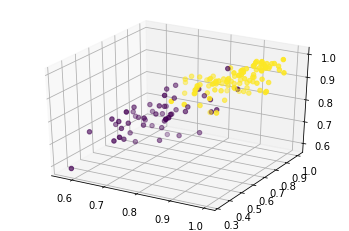

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Adult_Mortality', 'GDP_Health_Gov_Expenditure (%)',
       'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'Population', 'thinness1-19years',
       'Schooling'],
      dtype='object')
3 clusters: 0.2124505344987861
3 clusters: -71.17980113868803


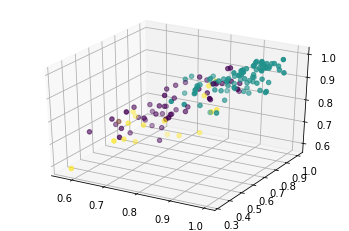

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Adult_Mortality', 'GDP_Health_Gov_Expenditure (%)',
       'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'Population', 'thinness1-19years',
       'Schooling'],
      dtype='object')
4 clusters: 0.17900859268055241
4 clusters: -62.449181846721906


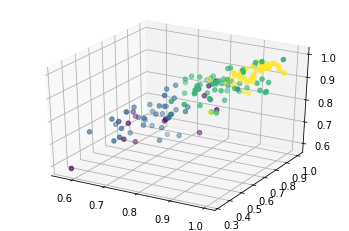

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Adult_Mortality', 'GDP_Health_Gov_Expenditure (%)',
       'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'Population', 'thinness1-19years',
       'Schooling'],
      dtype='object')
5 clusters: 0.19435963280613433
5 clusters: -56.467446388423696


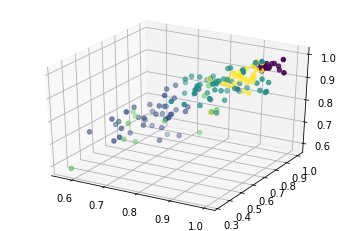

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
# X=df[np.random.choice(columns_int, replace=False, size=3)].dropna()
X = data_scaled[all].dropna()
guess_list=[2, 3, 4, 5]
for each_guess in guess_list: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels)
    print(f'{X.columns}')
    print(f'{each_guess} clusters: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters: {km.score(X, labels)}')
    plt.show()

In [35]:
cluster1=['Life_Expectancy (Happiness)','GDP', 'Social_Support','Schooling','Freedom_Score']
X=data_scaled[cluster1[:3]]
#len(X)

Index(['Life_Expectancy (Happiness)', 'GDP', 'Social_Support', 'HDI',
       'Schooling', 'Freedom_Score'],
      dtype='object')
2 clusters: 0.46395701430999303
2 clusters: -6.637033342959006


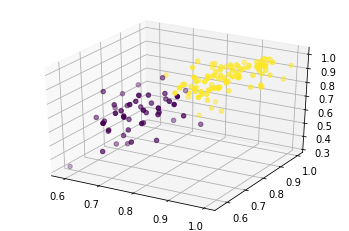

Index(['Life_Expectancy (Happiness)', 'GDP', 'Social_Support', 'HDI',
       'Schooling', 'Freedom_Score'],
      dtype='object')
3 clusters: 0.32956847909445475
3 clusters: -4.897294093101072


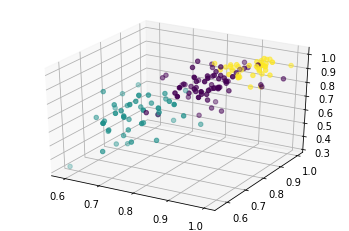

Index(['Life_Expectancy (Happiness)', 'GDP', 'Social_Support', 'HDI',
       'Schooling', 'Freedom_Score'],
      dtype='object')
4 clusters: 0.279056131938697
4 clusters: -4.096781198345739


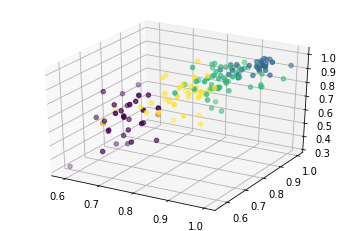

Index(['Life_Expectancy (Happiness)', 'GDP', 'Social_Support', 'HDI',
       'Schooling', 'Freedom_Score'],
      dtype='object')
5 clusters: 0.2925398422116697
5 clusters: -3.453966690001292


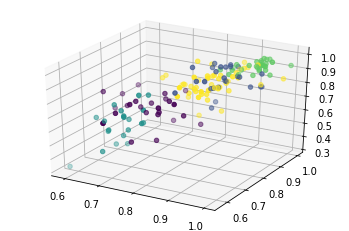

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
# X=df[np.random.choice(columns_int, replace=False, size=3)].dropna()
X = data_scaled[cluster1].dropna()
guess_list=[2, 3, 4, 5]
for each_guess in guess_list: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels)
    print(f'{X.columns}')
    print(f'{each_guess} clusters: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters: {km.score(X, labels)}')
    plt.show()

In [23]:
cluster2 =['Beer_Servings','Spirit_Servings','Wine_Servings']

Index(['Beer_Servings', 'Spirit_Servings', 'Wine_Servings'], dtype='object')
2 clusters: 0.5120926525329635
2 clusters: -12.589165062676345


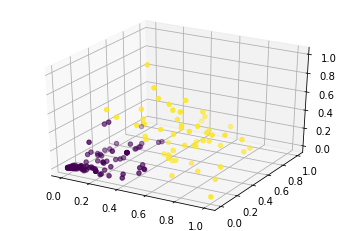

Index(['Beer_Servings', 'Spirit_Servings', 'Wine_Servings'], dtype='object')
3 clusters: 0.49385839609187127
3 clusters: -9.279330512760325


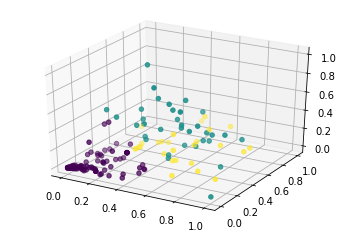

Index(['Beer_Servings', 'Spirit_Servings', 'Wine_Servings'], dtype='object')
4 clusters: 0.4424977430926513
4 clusters: -6.915212137314091


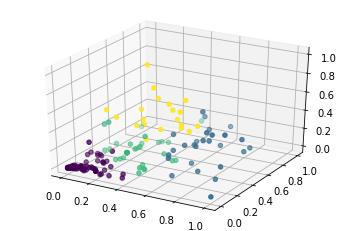

Index(['Beer_Servings', 'Spirit_Servings', 'Wine_Servings'], dtype='object')
5 clusters: 0.45149491543263776
5 clusters: -5.658139860451309


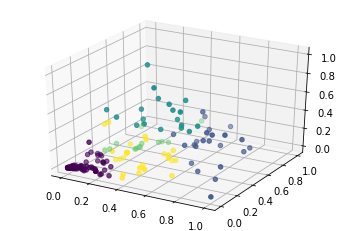

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
# X=df[np.random.choice(columns_int, replace=False, size=3)].dropna()
X = data_scaled[cluster2].dropna()
guess_list=[2, 3, 4, 5]
for each_guess in guess_list: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels)
    print(f'{X.columns}')
    print(f'{each_guess} clusters: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters: {km.score(X, labels)}')
    plt.show()

In [25]:
top3 = ['GDP', 'Social_Support','Life_Expectancy (Happiness)']

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)'], dtype='object')
2 clusters: 0.5448459328137902
2 clusters: -2.0056794500193282


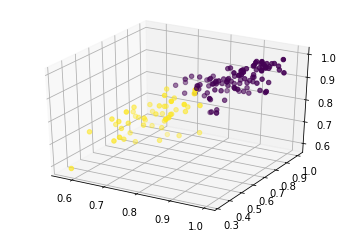

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)'], dtype='object')
3 clusters: 0.39583570918454125
3 clusters: -1.382492816116905


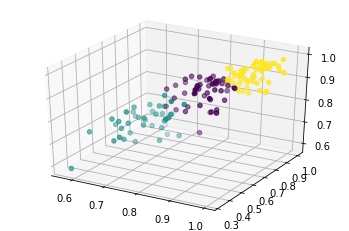

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)'], dtype='object')
4 clusters: 0.37606353114572016
4 clusters: -1.0824272951056884


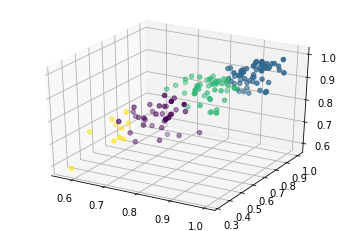

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)'], dtype='object')
5 clusters: 0.36067693760659075
5 clusters: -0.9244666790491348


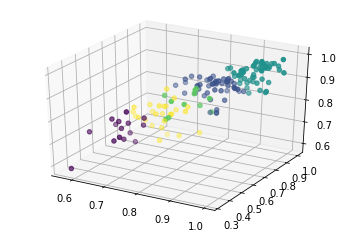

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
# X=df[np.random.choice(columns_int, replace=False, size=3)].dropna()
X = data_scaled[top3].dropna()
guess_list=[2, 3, 4, 5]
for each_guess in guess_list: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels)
    print(f'{X.columns}')
    print(f'{each_guess} clusters: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters: {km.score(X, labels)}')
    plt.show()